In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM, GRU, Bidirectional
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dongsi.csv to Dongsi.csv


In [4]:
data=read_csv("Dongsi.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [5]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Dongsi.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [6]:
dataset.drop("No", axis=1, inplace=True)

In [7]:
dataset=dataset.fillna(method="pad")

In [8]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [9]:
dataset.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,86.310293,110.584283,18.527338,52.194294,1363.244439,57.525669,13.668746,1012.551858,2.445117,0.063983,1.860712
std,86.337389,98.181732,22.974084,34.475533,1201.231679,58.674161,11.460066,10.266719,13.812242,0.786059,1.280429
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,23.000000,38.000000,3.427200,26.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,61.000000,87.000000,10.000000,46.000000,1000.000000,44.553600,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,120.000000,151.000000,24.000000,72.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [10]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

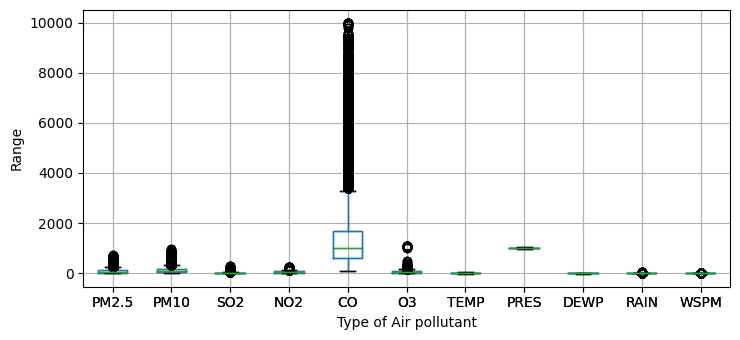

In [11]:
#Box plot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./isobaric.jpg', dpi=400)
plt.show()

<ipython-input-12-d43f7a3cbcd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(dataset.corr()))
<ipython-input-12-d43f7a3cbcd5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)


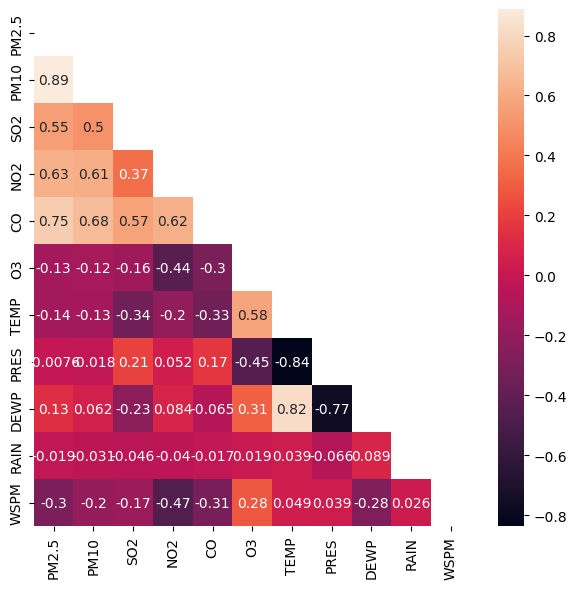

In [12]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
plt.savefig(r'./Dongsiheat.jpg', dpi=400)
# displaying heatmap
plt.show()

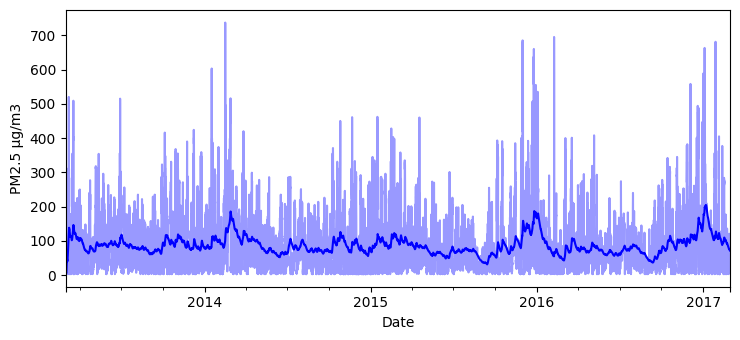

In [13]:
dataset['PM2.5'].to_frame()
f.set_figwidth(5)
f.set_figheight(3)
p=dataset["PM2.5"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=dataset['PM2.5'].ewm(span=720).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('PM2.5 µg/m3')
plt.savefig(r'./dongsi.jpg', dpi=400)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 7., 6., ..., 7., 6., 5.], dtype=float32)

In [15]:
values

array([[ 9. ,  9. ,  3. , ...,  0. ,  6. ,  5.7],
       [ 4. ,  4. ,  3. , ...,  0. ,  7. ,  3.9],
       [ 7. ,  7. ,  3. , ...,  0. ,  6. ,  5.3],
       ...,
       [23. , 58. ,  5. , ...,  0. ,  7. ,  1.1],
       [23. , 53. ,  9. , ...,  0. ,  6. ,  1.2],
       [30. , 71. , 11. , ...,  0. ,  5. ,  1.3]], dtype=float32)

In [16]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [17]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])

  return X,Y

In [18]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [19]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [20]:
model = Sequential()
model.add(Bidirectional(LSTM(units = 100, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units = 100, return_sequences = True)))
model.add(Dropout(0.2))


model.add(Bidirectional(LSTM(units = 100)))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=64,validation_data=(X_test, Y_test), verbose=1, shuffle=False)


Epoch 1/100
411/411 [==============================] - 59s 100ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 2/100
411/411 [==============================] - 33s 81ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 3/100
411/411 [==============================] - 34s 82ms/step - loss: 0.0024 - val_loss: 0.0073
Epoch 4/100
411/411 [==============================] - 35s 86ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/100
411/411 [==============================] - 34s 83ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/100
411/411 [==============================] - 36s 87ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
411/411 [==============================] - 33s 81ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/100
411/411 [==============================] - 34s 82ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/100
411/411 [==============================] - 36s 86ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/100
411/411 [==============================] - 33s 81ms/step - 

In [22]:
from keras.models import load_model
model.save('AirPollutionBiLSTMGRU.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


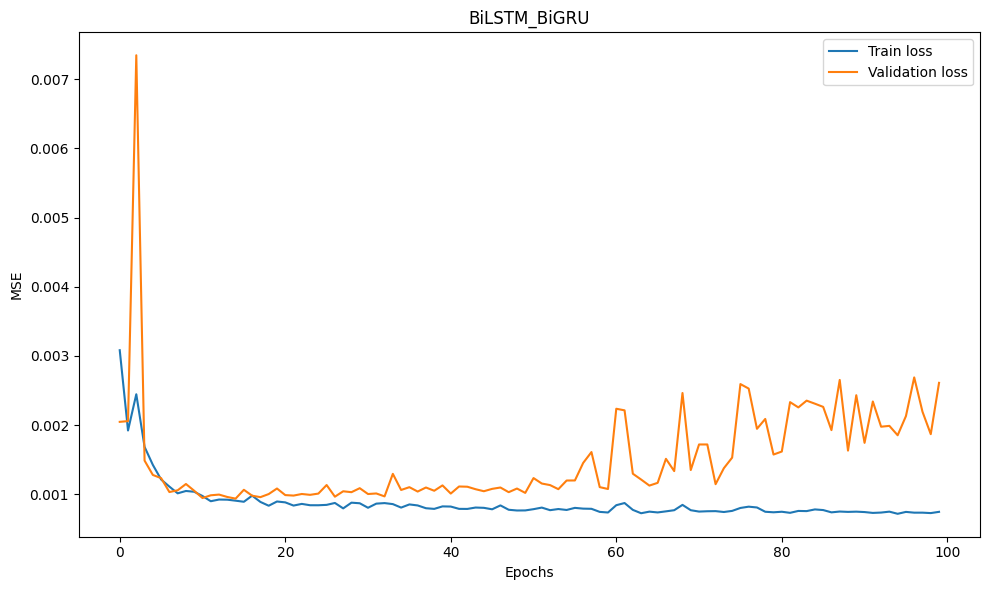

<Figure size 750x350 with 0 Axes>

In [23]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("BiLSTM_BiGRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('Traingraph.png')

In [24]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 5s 12ms/step
RMSE at 40 = 5.120309
RMAE at 40 = 2.0614915
MAPE at 40 = 0.642039
R2 at 40 = 0.9030986052659693
2/2 [==============================] - 0s 11ms/step
RMSE at 45 = 5.344894
RMAE at 45 = 2.08374
MAPE at 45 = 0.57614654
R2 at 45 = 0.9723316655329426
2/2 [==============================] - 0s 17ms/step
RMSE at 50 = 8.340435
RMAE at 50 = 2.430558
MAPE at 50 = 0.5357101
R2 at 50 = 0.967999990336987
2/2 [==============================] - 0s 11ms/step
RMSE at 55 = 9.848527
RMAE at 55 = 2.605279
MAPE at 55 = 0.50234735
R2 at 55 = 0.9605395586935901
2/2 [==============================] - 0s 14ms/step
RMSE at 60 = 10.062107
RMAE at 60 = 2.6799545
MAPE at 60 = 0.47087926
R2 at 60 = 0.9609588074008363
3/3 [==============================] - 0s 11ms/step
RMSE at 65 = 10.338483
RMAE at 65 = 2.7293077
MAPE at 65 = 0.44707927
R2 at 65 = 0.9594926070117227
3/3 [==============================] - 0s 9ms/step
RMSE at 70 = 14.741745
RMAE at 70 = 3.0043306
MAP

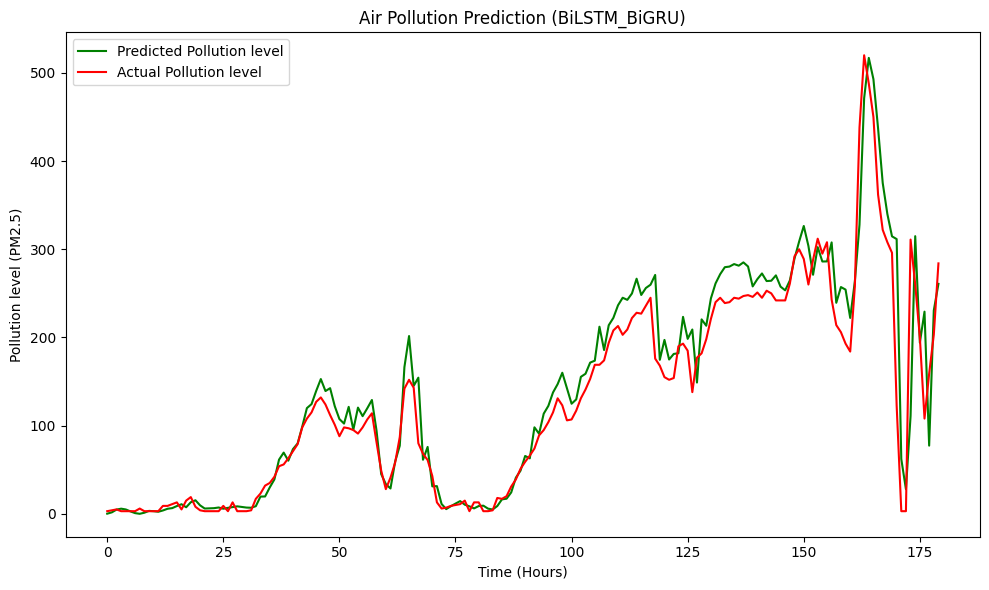

<Figure size 750x350 with 0 Axes>

In [25]:
plt.figure(figsize=(10,6))
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (BiLSTM_BiGRU)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graphBiLSTMBi_GRU.png')

In [26]:
savetxt('Predict_BiLSTM_BiGRU.csv', Y_predicted, delimiter=',')

In [27]:
savetxt('Test_BiLSTMBiGRU.csv', Y_test, delimiter=',')